# Team assembly

Implement a model of team assembly based on Guimera et al., (2005).

# Preliminaries

In [41]:
# load some packages
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pathlib
import seaborn as sns

# configuration
PROJECT_PATH = "/Users/rfunk/Dropbox/TEACHING/mgmt_8404_spring_2024/github/computational_social_science_for_organizational_research/sessions/networks/notebook/"

# Functions

# Version 0: Bare bones

In [42]:
# parameters
T = 20 # total time steps
m = 5 # team size

In [43]:
# create an empty graph
G = nx.Graph()

# create a variable to track the number of agents added
nagents_added = 0

# loop over time steps:
for t in range(0,T):

  # add nodes to the team (add newcomers)
  team_nodes = range(nagents_added,nagents_added+m)
  G.add_nodes_from(team_nodes)

  # add edges to the team (dyads)
  team_edges = list(itertools.combinations(team_nodes, 2))
  G.add_edges_from(team_edges)

  # update the number of agents added
  nagents_added += m

  # draw a network diagram and save to file
  plt.figure(figsize=(8, 6))
  nx.draw(G, with_labels=True)
    
  # define the plot file name based on the time step
  plot_path = PROJECT_PATH + "team_assembly/plots/version_0_bare_bones/"
  pathlib.Path(plot_path).mkdir(parents=True, 
                                exist_ok=True)
  plt.savefig(plot_path + f"network_{t}.png") 
  plt.close()

# Version 1: Team assembly

In [44]:
# parameters
T = 20 # total time steps
m = 5 # team size
p = 0.5 # probability of picking an incumbent to be on the team

In [45]:
# create an empty graph
G = nx.Graph()

# create a variable to track the number of agents added
nagents_added = 0

# loop over time steps:
for t in range(0,T):

  # list for recording current team members
  team_nodes = []
  # assemble the team from newcomers and incumbents
  for i in range(0,m):
    
    # determine whether i will be newcomer or incumbent
    if random.random() < p: # i is an incumbent

      # pick list of candidate incumbents (i.e., someone in the network but not already on the team)
      candidate_incumbents = [n for n in list(G.nodes()) if n not in team_nodes]

      # see if there are candidates
      if len(candidate_incumbents) > 0:
        # pick the incumbent and add to team_nodes
        team_nodes.append(random.choice(candidate_incumbents))
      else: # add a newcomer
        team_nodes.append(nagents_added+1)
        nagents_added += 1
    else: # if i is chosen to be a newcomer
        team_nodes.append(nagents_added+1)
        nagents_added += 1      

  # add nodes to the team
  G.add_nodes_from(team_nodes)

  # add edges to the team (dyads)
  team_edges = list(itertools.combinations(team_nodes, 2))

  # add edges to the team and increment weight for edges that already exist
  for edge in itertools.combinations(team_nodes, 2):
    if G.has_edge(*edge):
      G[edge[0]][edge[1]]["weight"] += 1
    else:
      G.add_edge(edge[0], edge[1], weight=1)

  # draw a network diagram and save to file
  plt.figure(figsize=(8, 6))

  # compute a layout for the nodes
  pos = nx.spring_layout(G)

  # plot the nodes
  nx.draw_networkx_nodes(G, pos)
  nx.draw_networkx_labels(G, pos)

  # get edge weights and scale them for plotting
  edges, weights = zip(*nx.get_edge_attributes(G, "weight").items())
  weights = [w * 0.5 for w in weights]

  # plot the edges
  nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights)

  # define the plot file name based on the time step
  plot_path = PROJECT_PATH + "team_assembly/plots/version_1_team_assembly/"
  pathlib.Path(plot_path).mkdir(parents=True, 
                                exist_ok=True)
  plt.savefig(plot_path + f"network_{t}.png") 
  plt.close()

# Version 2: Add repeat collaborations

In [46]:
# parameters
T = 20 # total time steps
m = 5 # team size
p = 0.5 # probability of picking an incumbent to be on the team
q = 0.7 # probability of an incumbent picking a prior collaborator

In [47]:
# create an empty graph
G = nx.Graph()

# create a variable to track the number of agents added
nagents_added = 0

# loop over time steps:
for t in range(0,T):

  # list for recording current team members
  team_nodes = []

  # assemble the team from newcomers and incumbents
  for i in range(m):
  
    # track current team size
    current_team_size = len(team_nodes)

    # try to add an incumbent based on probability p
    if random.random() < p:
      candidate_incumbents = [n for n in G.nodes() if n not in team_nodes]
      if candidate_incumbents: # see if there are any incumbents to add
        selected_incumbent = None
        # decide whether to pick from the incumbent's collaborators
        if random.random() < q:
          team_incumbents = list(set(G.nodes()).intersection(team_nodes))
          if team_incumbents: # see if there are any incumbents on the team
            team_incumbent = random.choice(team_incumbents)
            team_incumbent_candidate_neighbors = [n for n in G.neighbors(team_incumbent) if n not in team_nodes]
            if team_incumbent_candidate_neighbors: # see if the incumbent has any neighbors who are not on the team
              selected_incumbent = random.choice(team_incumbent_candidate_neighbors)
      
        # if not chosen from the incumbent's collaborators or no valid collaborators then pick any incumbent
        if selected_incumbent is None:
          team_nodes.append(random.choice(candidate_incumbents))
        else:
          team_nodes.append(selected_incumbent)

    # if an incumbent has not been added add a newcomer
    if len(team_nodes) == current_team_size:
      team_nodes.append(nagents_added + 1)
      nagents_added += 1
      
  # add nodes to the team
  G.add_nodes_from(team_nodes)

  # add edges to the team (dyads)
  team_edges = list(itertools.combinations(team_nodes, 2))

  # add edges to the team and increment weight for edges that already exist
  for edge in itertools.combinations(team_nodes, 2):
    if G.has_edge(*edge):
      G[edge[0]][edge[1]]["weight"] += 1
    else:
      G.add_edge(edge[0], edge[1], weight=1)

  # draw a network diagram and save to file
  plt.figure(figsize=(8, 6))

  # compute a layout for the nodes
  pos = nx.spring_layout(G)

  # plot the nodes
  nx.draw_networkx_nodes(G, pos)
  nx.draw_networkx_labels(G, pos)

  # get edge weights and scale them for plotting
  edges, weights = zip(*nx.get_edge_attributes(G, "weight").items())
  weights = [w * 0.5 for w in weights]

  # plot the edges
  nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights)

  # define the plot file name based on the time step
  plot_path = PROJECT_PATH + "team_assembly/plots/version_2_add_repeat_collaborations/"
  pathlib.Path(plot_path).mkdir(parents=True, 
                                exist_ok=True)
  plt.savefig(plot_path + f"network_{t}.png") 
  plt.close()

# Version 3: Add removal of deadwood

In [48]:
# parameters
T = 20 # total time steps
m = 5 # team size
p = 0.5 # probability of picking an incumbent to be on the team
q = 0.7 # probability of an incumbent picking a prior collaborator
tau = 5 # remove agents if they have been inactive after this many time periods

In [49]:
# create an empty graph
G = nx.Graph()

# create a variable to track the number of agents added
nagents_added = 0

# loop over time steps:
for t in range(0,T):

  # list for recording current team members
  team_nodes = []

  # assemble the team from newcomers and incumbents
  for i in range(m):
  
    # track current team size
    current_team_size = len(team_nodes)

    # try to add an incumbent based on probability p
    if random.random() < p:
      candidate_incumbents = [n for n in G.nodes() if n not in team_nodes]
      if candidate_incumbents: # see if there are any incumbents to add
        selected_incumbent = None
        # decide whether to pick from the incumbent's collaborators
        if random.random() < q:
          team_incumbents = list(set(G.nodes()).intersection(team_nodes))
          if team_incumbents: # see if there are any incumbents on the team
            team_incumbent = random.choice(team_incumbents)
            team_incumbent_candidate_neighbors = [n for n in G.neighbors(team_incumbent) if n not in team_nodes]
            if team_incumbent_candidate_neighbors: # see if the incumbent has any neighbors who are not on the team
              selected_incumbent = random.choice(team_incumbent_candidate_neighbors)
      
        # if not chosen from the incumbent's collaborators or no valid collaborators then pick any incumbent
        if selected_incumbent is None:
          team_nodes.append(random.choice(candidate_incumbents))
        else:
          team_nodes.append(selected_incumbent)

    # if an incumbent has not been added add a newcomer
    if len(team_nodes) == current_team_size:
      team_nodes.append(nagents_added + 1)
      nagents_added += 1
      
  # add nodes to the team
  G.add_nodes_from(team_nodes, last_active=t) # set last active t

  # add edges to the team (dyads)
  team_edges = list(itertools.combinations(team_nodes, 2))

  # add edges to the team and increment weight for edges that already exist
  for edge in itertools.combinations(team_nodes, 2):
    if G.has_edge(*edge):
      G[edge[0]][edge[1]]["weight"] += 1
    else:
      G.add_edge(edge[0], edge[1], weight=1)

  # remove deadwood
  deadwood_nodes = [n[0] for n in list(G.nodes(data=True)) if t-n[1]["last_active"]>tau]
  G.remove_nodes_from(deadwood_nodes)

  # draw a network diagram and save to file
  plt.figure(figsize=(8, 6))

  # compute a layout for the nodes
  pos = nx.spring_layout(G)

  # plot the nodes
  nx.draw_networkx_nodes(G, pos)
  nx.draw_networkx_labels(G, pos)

  # get edge weights and scale them for plotting
  edges, weights = zip(*nx.get_edge_attributes(G, "weight").items())
  weights = [w * 0.5 for w in weights]

  # plot the edges
  nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights)

  # define the plot file name based on the time step
  plot_path = PROJECT_PATH + "team_assembly/plots/version_3_remove_deadwood/"
  pathlib.Path(plot_path).mkdir(parents=True, 
                                exist_ok=True)
  plt.savefig(plot_path + f"network_{t}.png") 
  plt.close()

# Version 4: Modular code

In [51]:
def get_team_members(G, nagents_added, p, q):
  """Get a list of team members to add to the network."""
  # list for recording current team members
  team_nodes = []

  # assemble the team from newcomers and incumbents
  for i in range(m):
  
    # track current team size
    current_team_size = len(team_nodes)

    # try to add an incumbent based on probability p
    if random.random() < p:
      candidate_incumbents = [n for n in G.nodes() if n not in team_nodes]
      if candidate_incumbents: # see if there are any incumbents to add
        selected_incumbent = None
        # decide whether to pick from the incumbent's collaborators
        if random.random() < q:
          team_incumbents = list(set(G.nodes()).intersection(team_nodes))
          if team_incumbents: # see if there are any incumbents on the team
            team_incumbent = random.choice(team_incumbents)
            team_incumbent_candidate_neighbors = [n for n in G.neighbors(team_incumbent) if n not in team_nodes]
            if team_incumbent_candidate_neighbors: # see if the incumbent has any neighbors who are not on the team
              selected_incumbent = random.choice(team_incumbent_candidate_neighbors)
      
        # if not chosen from the incumbent's collaborators or no valid collaborators then pick any incumbent
        if selected_incumbent is None:
          team_nodes.append(random.choice(candidate_incumbents))
        else:
          team_nodes.append(selected_incumbent)

    # if an incumbent has not been added add a newcomer
    if len(team_nodes) == current_team_size:
      team_nodes.append(nagents_added + 1)
      nagents_added += 1

  return team_nodes, nagents_added

In [52]:
def add_nodes_and_edges(G, team_nodes):
  """Add nodes and edges for the team to the network."""
  # add nodes to the team
  G.add_nodes_from(team_nodes, last_active=t) # set last active t

  # add edges to the team (dyads)
  team_edges = list(itertools.combinations(team_nodes, 2))

  # add edges to the team and increment weight for edges that already exist
  for edge in itertools.combinations(team_nodes, 2):
    if G.has_edge(*edge):
      G[edge[0]][edge[1]]["weight"] += 1
    else:
      G.add_edge(edge[0], edge[1], weight=1)

  return G

In [53]:
def remove_deadwood(G,t,tau):
  """Remove inactive nodes from the network."""
  deadwood_nodes = [n[0] for n in list(G.nodes(data=True)) if t-n[1]["last_active"]>tau]
  G.remove_nodes_from(deadwood_nodes)

  return G

In [54]:
def draw_and_save_network(G, t, plot_path):
  """Draw and save a network."""

  # draw a network diagram and save to file
  plt.figure(figsize=(8, 6))

  # compute a layout for the nodes
  pos = nx.spring_layout(G)

  # plot the nodes
  nx.draw_networkx_nodes(G, pos)
  nx.draw_networkx_labels(G, pos)

  # get edge weights and scale them for plotting
  edges, weights = zip(*nx.get_edge_attributes(G, "weight").items())
  weights = [w * 0.5 for w in weights]

  # plot the edges
  nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights)

  # define the plot file name based on the time step
  pathlib.Path(plot_path).mkdir(parents=True, 
                                exist_ok=True)
  plt.savefig(plot_path + f"network_{t}.png") 
  plt.close()

In [55]:
# parameters
T = 20 # total time steps
m = 5 # team size
p = 0.5 # probability of picking an incumbent to be on the team
q = 0.7 # probability of an incumbent picking a prior collaborator
tau = 5 # remove agents if they have been inactive after this many time periods

# create an empty graph
G = nx.Graph()

# create a variable to track the number of agents added
nagents_added = 0

# loop over time steps:
for t in range(0,T):

  # get nodes to add to the team
  team_nodes, nagents_added = get_team_members(G=G, nagents_added=nagents_added, p=p, q=q)

  # add nodes and edges to the network
  G = add_nodes_and_edges(G, team_nodes)

  # remove deadwood
  remove_deadwood(G=G,t=t,tau=tau)

  # plot the network and save
  draw_and_save_network(G=G, t=t, plot_path=PROJECT_PATH + "team_assembly/plots/version_4_modular_code/")

# Version 5: More modular

## Class definition

In [56]:
class TeamAssemblySimulation:
  def __init__(self, T, m, p, q, tau, plot_path=None):
    self.T = T
    self.m = m
    self.p = p
    self.q = q
    self.tau = tau
    if plot_path is not None:
      self.plot_path = pathlib.Path(plot_path)
    else:
      self.plot_path = None
    self.G = nx.Graph()
    self.nagents_added = 0

  def get_team_members(self):
    """Get a list of team members to add to the network."""
    team_nodes = []

    for i in range(self.m):
      current_team_size = len(team_nodes)
      if random.random() < self.p:
        candidate_incumbents = [n for n in self.G.nodes() if n not in team_nodes]
        if candidate_incumbents:
          selected_incumbent = None
          if random.random() < self.q:
            team_incumbents = list(set(self.G.nodes()).intersection(team_nodes))
            if team_incumbents:
              team_incumbent = random.choice(team_incumbents)
              team_incumbent_candidate_neighbors = [n for n in self.G.neighbors(team_incumbent) if n not in team_nodes]
              if team_incumbent_candidate_neighbors:
                selected_incumbent = random.choice(team_incumbent_candidate_neighbors)
          if selected_incumbent is None:
            team_nodes.append(random.choice(candidate_incumbents))
          else:
            team_nodes.append(selected_incumbent)
      if len(team_nodes) == current_team_size:
        team_nodes.append(self.nagents_added + 1)
        self.nagents_added += 1

    return team_nodes

  def add_nodes_and_edges(self, team_nodes, t):
    """Add nodes and edges for the team to the network."""
    self.G.add_nodes_from(team_nodes, last_active=t)  # set last active t

    # add edges to the team (dyads)
    team_edges = list(itertools.combinations(team_nodes, 2))

    # add edges to the team and increment weight for edges that already exist
    for edge in itertools.combinations(team_nodes, 2):
      if self.G.has_edge(*edge):
        self.G[edge[0]][edge[1]]["weight"] += 1
      else:
        self.G.add_edge(edge[0], edge[1], weight=1)

  def remove_deadwood(self, t):
    """Remove inactive nodes from the network."""
    deadwood_nodes = [n[0] for n in list(self.G.nodes(data=True)) if t-n[1]["last_active"]>self.tau]
    self.G.remove_nodes_from(deadwood_nodes)

  def draw_and_save_network(self, t):
    """Draw and save a network."""

    # draw a network diagram and save to file
    plt.figure(figsize=(8, 6))

    # compute a layout for the nodes
    pos = nx.spring_layout(self.G)

    # plot the nodes
    nx.draw_networkx_nodes(self.G, pos)
    nx.draw_networkx_labels(self.G, pos)

    # get edge weights and scale them for plotting
    edges, weights = zip(*nx.get_edge_attributes(self.G, "weight").items())
    weights = [w * 0.5 for w in weights]

    # plot the edges
    nx.draw_networkx_edges(self.G, pos, edgelist=edges, width=weights)

    # define the plot file name based on the time step
    pathlib.Path(self.plot_path).mkdir(parents=True, 
                                       exist_ok=True)
    plt.savefig(self.plot_path / f"network_{t}.png") 
    plt.close()

  def run_simulation(self):
    for t in range(self.T):
      team_nodes = self.get_team_members()
      self.add_nodes_and_edges(team_nodes, t)
      self.remove_deadwood(t)
      if self.plot_path is not None:
        self.draw_and_save_network(t)
    return self.G

## Helper function definitions

In [57]:
def giant_component_fraction(G):
  """Return the fraction of nodes in the giant component."""
  largest_component = max(nx.connected_components(G), key=len)
  return len(largest_component) / len(G.nodes())

## Run simulations

In [37]:
# parameters
num_steps = 300
ps = np.linspace(0.0, 1.0, num_steps)
qs = np.linspace(0.0, 1.0, num_steps)
T=1000
m=5
tau=5

In [38]:
# create a matrix to store the results for each p,q pair
results_mtx = np.zeros((len(ps), len(qs)))

In [39]:
# Loop over all combinations of p and q
for i, p in enumerate(ps):
  for j, q in enumerate(qs):
    print(f"working on {i},{j} / p={p}, q={q}...")
    sim = TeamAssemblySimulation(T=T, m=m, p=p, q=q, tau=5)
    G = sim.run_simulation()
    results_mtx[i, j] = giant_component_fraction(G) # we'll save the giant component fraction

working on 0,0 / p=0.0, q=0.0...
working on 0,1 / p=0.0, q=0.0033444816053511705...
working on 0,2 / p=0.0, q=0.006688963210702341...
working on 0,3 / p=0.0, q=0.010033444816053512...
working on 0,4 / p=0.0, q=0.013377926421404682...
working on 0,5 / p=0.0, q=0.016722408026755852...
working on 0,6 / p=0.0, q=0.020066889632107024...
working on 0,7 / p=0.0, q=0.023411371237458192...
working on 0,8 / p=0.0, q=0.026755852842809364...
working on 0,9 / p=0.0, q=0.030100334448160536...
working on 0,10 / p=0.0, q=0.033444816053511704...
working on 0,11 / p=0.0, q=0.03678929765886287...
working on 0,12 / p=0.0, q=0.04013377926421405...
working on 0,13 / p=0.0, q=0.043478260869565216...
working on 0,14 / p=0.0, q=0.046822742474916385...
working on 0,15 / p=0.0, q=0.05016722408026756...
working on 0,16 / p=0.0, q=0.05351170568561873...
working on 0,17 / p=0.0, q=0.056856187290969896...
working on 0,18 / p=0.0, q=0.06020066889632107...
working on 0,19 / p=0.0, q=0.06354515050167224...
working on 0

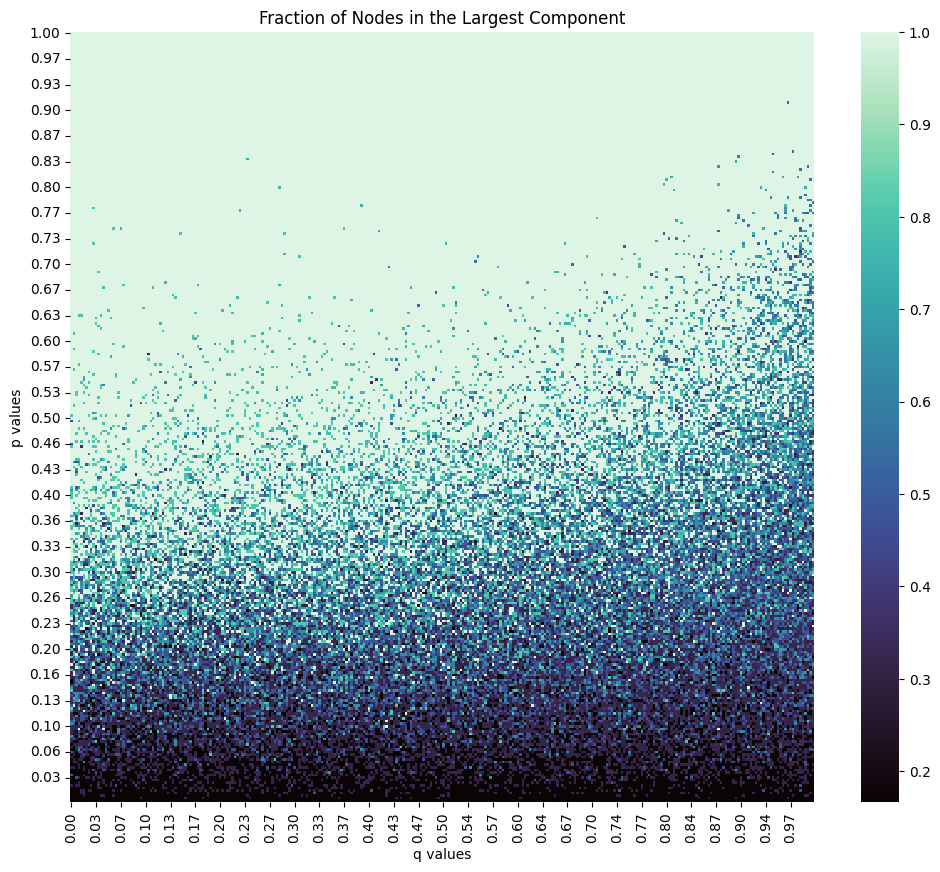

In [40]:
# visualize the results
plt.figure(figsize=(12, 10))

# set tick step
tick_step = 10

# get tick labels
xtick_positions = np.arange(0, len(qs), tick_step) + 0.5
ytick_positions = np.arange(0, len(ps), tick_step) + 0.5
xticklabels = [f"{q:.2f}" if idx % tick_step == 0 else "" for idx, q in enumerate(qs)]
yticklabels = [f"{p:.2f}" if idx % tick_step == 0 else "" for idx, p in enumerate(ps[::-1])]
xticklabels_adjusted = [xticklabels[int(pos - 0.5)] for pos in xtick_positions]
yticklabels_adjusted = [yticklabels[int(pos - 0.5)] for pos in ytick_positions]

# plot heatmap
sns.heatmap(results_mtx[::-1], # reverse so q has 0.0 at the bottom
            cmap="mako", 
            xticklabels=xticklabels_adjusted, 
            yticklabels=yticklabels_adjusted)
plt.title("Fraction of Nodes in the Largest Component")
plt.xlabel("q values")
plt.ylabel("p values")
plt.xticks(xtick_positions, xticklabels_adjusted)
plt.yticks(ytick_positions, yticklabels_adjusted, rotation=0)
plt.show()